# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [206]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [207]:
# add code here
df=pd.read_csv('housing_data.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [208]:
# add code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [209]:
# add code here
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [210]:
# add code here
for col in df.columns:
  print(col)

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

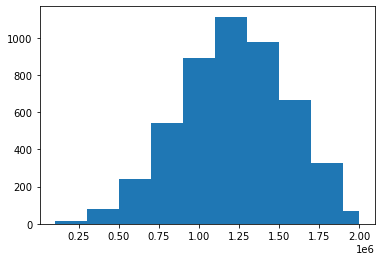

In [211]:
# add code here

plt.hist(df["Price"], bins=[100000, 300000, 500000, 700000, 900000, 1100000, 1300000, 1500000, 1700000, 1900000, 2000000])
         
  
plt.show()


**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

<AxesSubplot:>

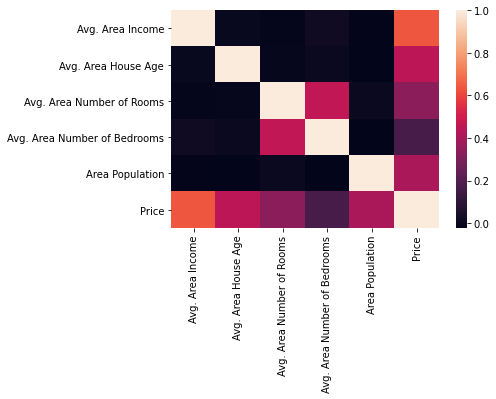

In [212]:
# add code here
sns.heatmap(df.corr())

### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [213]:
# add code here
cols = {}
cols = df.columns
cols

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [214]:
# This code should print (5000, 5) and (5000,) if everything is correct
X = df.iloc[:, [0,1,2,3,4]].values
y = df.iloc[:, 5].values

In [215]:
# print a few record of X
# add code here
X

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [216]:
# print a few record of y
# add code here
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

### Test-train split

**Import train_test_split function from scikit-learn**

In [217]:
# add code here
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [218]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [219]:
# add code here
print(X_train.shape)
print(X_train.size)

print(X_test.shape)
print(X_test.size)

print(y_train.shape)
print(y_train.size)

print(y_test.shape)
print(y_test.size)

(3500, 5)
17500
(1500, 5)
7500
(3500,)
3500
(1500,)
1500


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [220]:
# add code for imports here
from sklearn.linear_model import LinearRegression 
# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here
lm = LinearRegression()

**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [221]:
# add code here
lm.fit(X_train, y_train)

LinearRegression()

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [222]:
# add code here
predictions = lm.predict(X_test)
print(predictions.shape)
predictions.size

(1500,)


1500

**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

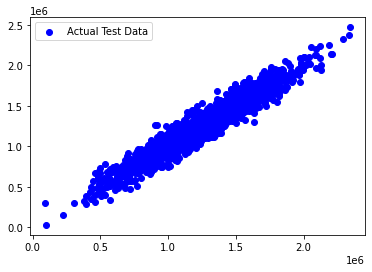

In [223]:
# add code here
plt.scatter(predictions, y_test, label="Actual Test Data", color="b")
plt.legend()
plt.show()


**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [224]:
# add code here
print("Accuracy Score: ", np.around(lm.score(X_test, y_test), decimals=3))

Accuracy Score:  0.92


# 2) K-nearest neighbor Classification

### Import packages and dataset

In [4]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [5]:
# add code here
df = pd.read_csv("classified_data.txt", index_col = 0)
df.head

<bound method NDFrame.head of           WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0    0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1    0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2    0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3    1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4    1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240  0.746811   
996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540  1.055928   
997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738  0.386802   
998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859  0.855806   
999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762  0.778234   

          PJF       HQE       NXJ  TARGET CLA

### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [6]:
# add code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [7]:
# add code here
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [8]:
# add code here
cols = []
for col in df.columns:
  cols.append(col)

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

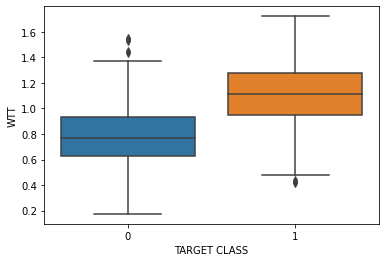

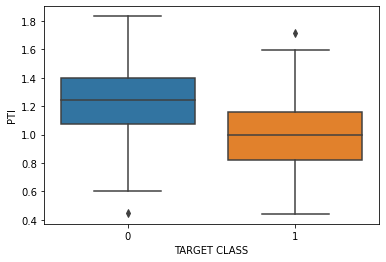

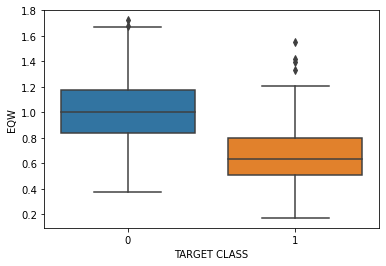

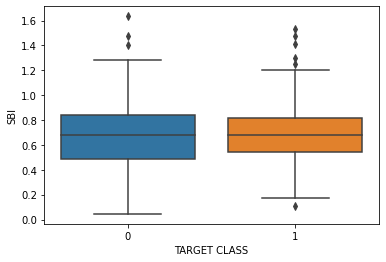

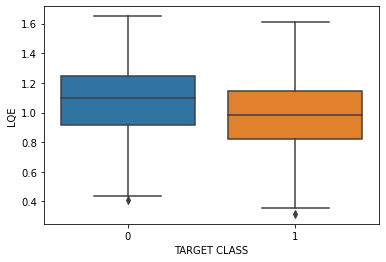

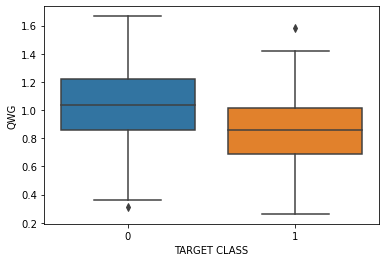

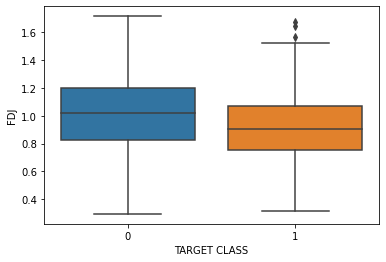

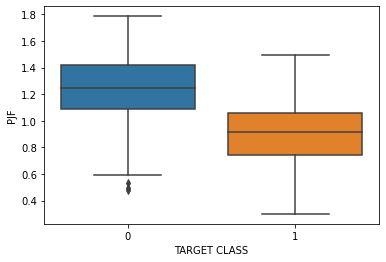

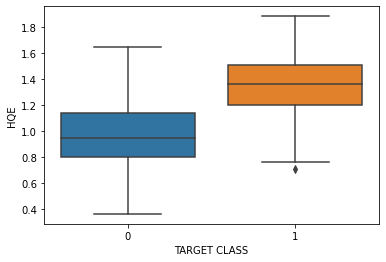

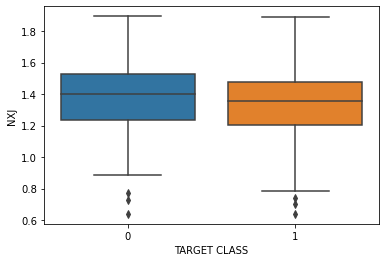

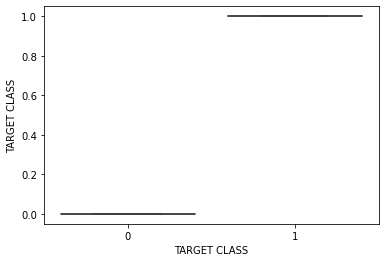

In [75]:
# add code here
for col in cols:
    sns.boxplot(y=col, x='TARGET CLASS' , data = df)
    plt.show()

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [10]:
# add code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [11]:
# add code here
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values

In [12]:
X = scaler.fit_transform(X)

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [13]:
df_feat = pd.DataFrame(X)
df_feat.columns = ['WTT', 'PTI', 'EQW', 'SBI','LQE','QWG','FDJ','PJF','HQE','NXJ']

In [14]:
# add code here
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [15]:
# add code here
X = df_feat
y = df.iloc[:,-1].values

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [16]:
# add code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 101)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [17]:
# add code here
from sklearn.neighbors import  KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [18]:
# add code here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred = knn.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [23]:
# add code here
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [29]:
# add code here
print(np.around(accuracy_score(y_test, pred), decimals=3))

0.923


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [32]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
accuracy_rate = []

for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df_feat, df["TARGET CLASS"], cv=10)
    accuracy_rate.append(score.mean())
    


**Plot a graph of K value vs Accuracy**

Text(0, 0.5, 'Accuracy Rate')

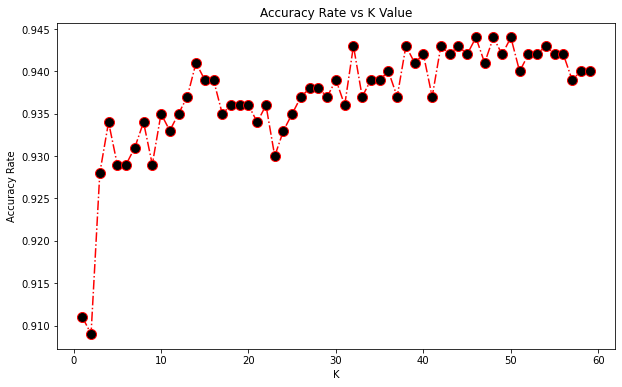

In [51]:
# add code here
plt.figure(figsize=(10,6))
plt.plot(range(1,60), accuracy_rate, color="red", linestyle="dashdot", marker="o", markerfacecolor="black", markersize=10)
plt.title("Accuracy Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy Rate")

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [74]:
# add code here 
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(classification_report(y_test, pred))
print('\n')
print("Accuracy Score: ", np.around(accuracy_score(y_test, pred), decimals=3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       159
           1       0.94      0.93      0.93       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Accuracy Score:  0.937


Reason : From the plot above, we can see the accuracy values for different K values. We can see that the plots are not in sync at the start and continue to be so till a certain point. However, after the plot of K=23, the accuracy score only goes on increasing and the values are fairly consistent, within the range of 0.93 and 0.94. Thus, 23 would be a good choice for the number of neighbours as the accuracy only increases after that.

# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [113]:
#write code here
df = pd.read_csv("titanic_data.csv")

<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [114]:
def titanic_preprocessing_pipeline(df):
    import re
    names = df["Name"]

    def get_title(name):
        title_search = re.search(' ([A-Za-z]+)\.', name)
        if title_search:
            return title_search.group(1)
        return ""
   
    for name in names:
        df['Title'] = df['Name'].apply(get_title)
        
    df.drop(columns=["PassengerId", "Ticket", "Name"], axis=1, inplace=True)
    df.drop(["Cabin"], axis=1, inplace=True)
    
    embarked_mean = df["Embarked"].mode()[0]
    df['Embarked'].fillna(embarked_mean, inplace=True)

    age_mean = df["Age"].mean()
    df["Age"].fillna(age_mean, inplace=True)
    
    sum_column = df['SibSp'] + df['Parch']
    df['Family_Members'] = sum_column
    
    df.drop(["SibSp", "Parch"], axis=1, inplace=True)
    
    df["Age"] = (df["Age"] - df["Age"].min()) / (df["Age"].max() - df["Age"].min())
    df["Fare"] = (df["Fare"] - df["Fare"].min()) / (df["Fare"].max() - df["Fare"].min())
    df["Family_Members"] = (df["Family_Members"] - df["Family_Members"].min()) / (df["Family_Members"].max() - df["Family_Members"].min())

    


    
titanic_preprocessing_pipeline(df)
df_ohe = pd.get_dummies(df, columns=["Pclass", "Sex", "Title", "Embarked"])
# df_ohe["Survived"] = df["Survived"]
print(df_ohe)



     Survived       Age      Fare  Family_Members  Pclass_1  Pclass_2  \
0           0  0.271174  0.014151             0.1         0         0   
1           1  0.472229  0.139136             0.1         1         0   
2           1  0.321438  0.015469             0.0         0         0   
3           1  0.434531  0.103644             0.1         1         0   
4           0  0.434531  0.015713             0.0         0         0   
..        ...       ...       ...             ...       ...       ...   
886         0  0.334004  0.025374             0.0         0         1   
887         1  0.233476  0.058556             0.0         1         0   
888         0  0.367921  0.045771             0.3         0         0   
889         1  0.321438  0.058556             0.0         1         0   
890         0  0.396833  0.015127             0.0         0         0   

     Pclass_3  Sex_female  Sex_male  Title_Capt  ...  Title_Mlle  Title_Mme  \
0           1           0         1         

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [115]:
#write code here
y_label = df_ohe["Survived"]

<b>remove the y_label (survived) from the dataframe</b>

In [116]:
#write code here
X = df_ohe.drop(["Survived"], axis=1)

<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [117]:
#write code here
X_train, X_test, y_train, y_test = train_test_split(X , y_label, test_size = 0.3, random_state = 101)



<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [185]:
#write code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [198]:
train_accuracy = []
test_accuracy = []

for depth in range(1,10):
    dtree=DecisionTreeClassifier(max_depth = depth, random_state=10)
    dtree.fit(X_train,y_train)
    train_accuracy.append(dtree.score(X_train, y_train))
    test_accuracy.append(dtree.score(X_test, y_test))

# for leaf in range(1,10):
#     dtree=DecisionTreeClassifier(min_samples_leaf = leaf, random_state=10)
#     dtree.fit(X_train,y_train)
#     train_accuracy.append(dtree.score(X_train, y_train))
#     test_accuracy.append(dtree.score(X_test, y_test))
    

# Adamodel = AdaBoostClassifier(n_estimators=100, learning_rate=1)   


In [199]:
frame = pd.DataFrame({"max_depth":range(1,10), "train_acc":train_accuracy, "test_acc":test_accuracy})
frame

# model = Adamodel.fit(X_train, y_train)

# pred = model.predict(X_test)

,max_depth,train_acc,test_acc
0,1,0.796148,0.764925
1,2,0.805778,0.772388
2,3,0.831461,0.802239
3,4,0.842697,0.798507
4,5,0.855538,0.809701
5,6,0.871589,0.802239
6,7,0.884430,0.791045
7,8,0.903692,0.798507
8,9,0.916533,0.761194


In [200]:
dtree=DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 25, random_state=10)

In [201]:
dtree.fit(X_train,y_train)
dtree.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=25, random_state=10)

<b>print the test accuracy and train accuracy here</b>

In [202]:
print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))

0.7897271268057785
0.8582089552238806


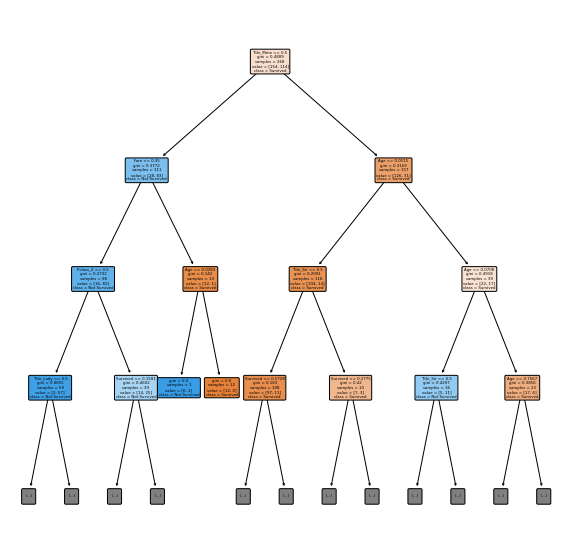

In [203]:
# Visualising the graph without the use of graphviz
from sklearn.tree import plot_tree
plt.figure(figsize = (10,10))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df_ohe.columns, 
                     class_names =["Survived", "Not Survived"] , filled = True ,max_depth=3, precision = 4, rounded = True)